LIBRERÍAS

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import math
import sympy as sp
from random import sample
from time import time

### Problem 1. Measuring 'Vulnerability'
Given A large un-directed un-weighted connected graph $G$ with adjancency matrix A;

Find: A single number $V(G)$, reflecting the 'Vulnerability' of the whole graph.

Para medir la vulnerabilidad se considera el primer valor propio (el más grande de todos).

Matriz de adyacencia:
[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]
Vulnerabilidad: 1.7320508075688805


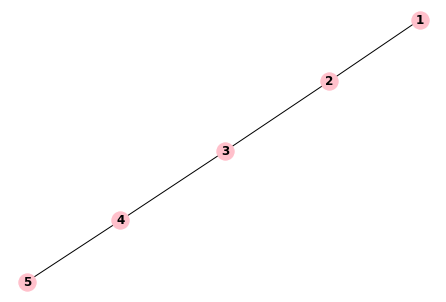

In [2]:
H = nx.Graph()
H.add_nodes_from([1,2,3,4,5])
H.add_edges_from([(1,2),(2,3), (3,4),(4,5)])
nx.draw(H, with_labels=True, font_weight='bold', node_color='pink')

A = nx.adjacency_matrix(H)
print('Matriz de adyacencia:')
print(A.todense())

w, v = LA.eig(A.todense())
print('Vulnerabilidad:',max(w))

Matriz de adyacencia:
[[0 1 1 1 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]
Vulnerabilidad: 2.0


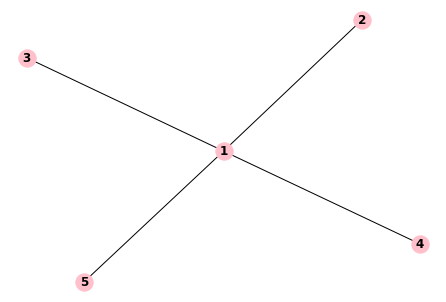

In [3]:
F = nx.Graph()
F.add_nodes_from([1,2,3,4,5])
F.add_edges_from([(1,2),(1,3), (1,4),(1,5)])
nx.draw(F, with_labels=True, font_weight='bold', node_color='pink')

A = nx.adjacency_matrix(F)
print('Matriz de adyacencia:')
print(A.todense())

w, v = LA.eig(A.todense())
print('Vulnerabilidad:',max(w))

### Problem 2. Proposed 'Shield-Value' Score
Given: A subset $S$ with $k$ nodes in a large un-directed un-weighted connected graph $G$ with adjacency matrix $A$.
Find: A single number $Sv(S)$ reflecting the 'Shield-value' of these $k$ nodes (that is, the benefit of their removal/ immunization to the vulnerability of the graph).

Se propone una aproximación a la caída del valor propio, $$Sv(S) = \sum_{i\in S} 2\lambda u(i)^2 - \sum_{i,j \in S} A(i,j)u(i)u(j)$$

##### Notación, 
$A(i,j)$ es el elemento del renglón $i$ y la columna $j$ de la matriz $A$.

$u$ es el vector propio, y $u(i)$ es la entrada $i$ del vector.

$\lambda$ es el primer valor propio de la matriz $A$.

Nota: El primer eigen valor es el eigen valor más grande.

##### Ejemplo.

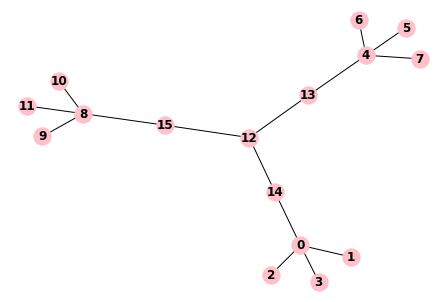

In [4]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
G.add_edges_from([(0,1), (0,2), (0,3),(0,14), (14,12),(12,15), (12,13),(13,4), (4,6),(4,7),(4,5), (15,8), (8,9),
                  (8,11), (8,10)])

nx.draw(G, with_labels=True, font_weight='bold', node_color='pink')

Calculo de la matriz de adyacencia y su primer valor propio junto con el vector propio asociado.

In [5]:
A = nx.adjacency_matrix(G)
A = A.todense()
print('Matriz de adyacencia:')
print(A)

R = sp.Matrix(A)
eigen = R.eigenvects()
lam=float(max([x for (x,y,z) in eigen ]))
u = eigen[np.argmax([x for (x,y,z) in eigen ])][2][0]
u=[float(x) for x in u]

print('Vulnerabilidad:', lam)

print('Vector propio:')
print(u)

Matriz de adyacencia:
[[0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]]
Vulnerabilidad: 2.302775637731995
Vector propio:
[1.0, 0.4342585459106649, 0.4342585459106649, 0.4342585459106649, 1.0, 0.4342585459106649, 0.4342585459106649, 0.4342585459106649, 1.0, 0.4342585459106649, 0.4342585459106649, 0.4342585459106649, 1.3027756377319946, 1.0, 1.0, 1.0]


La función potencia nos ayuda a encontrar el conjunto potencia del conjunto de nodos, los cuales son posibles soluciones a nuestro problema.

In [6]:
def potencia(c):
    if len(c) == 0:
        return [[]]
    r = potencia(c[:-1])
    return r + [s + [c[-1]] for s in r]

In [7]:
def shield_value_score(S):
    x = 0
    y = 0
    for i in S:
        x = x + 2*lam*(u[i]**2)
        for j in S:
            y =A[i,j]*u[i]*u[j]
    m = x - y
    return(m)

In [8]:
def exhaustivo(k):
    global G, A, lam, u
    m = [x for x in range(len(G.nodes))]
    vs=-1*math.inf
    for S in potencia(m):
        if(len(S)==k):
            if (shield_value_score(S)>vs):
                vs = shield_value_score(S)
                nodos = S 

    return(nodos)

#### Problem 3

Encontrar $k$ nodos con el mejor 'shield-value'


Given: A large un-directed un-weighted connected graph $G$

Find: A subset $S$ de $k$ nodes with the highest 'Shield-value' score among all ${n \choose k}$ possible subsets.

In [9]:
def NetShield(k):
    global G, A, lam, u
    if k > len(G.nodes):
        return('Error: k should be at must n')
    S=[]
    v=[]
    B=[]
    b=[]
    for j in range(len(G.nodes)):
        v.append((2*lam - A[j,j])*(u[j]**2))
    
    for x in range(k):
        B = A[:,S]
        r = np.array([[u[i] for i in S]]).T
        b = B*r
        score=[]
        for j in range(len(G.nodes)):
            if j in S:
                score.append(-1)
            else: 
                score.append(v[j] - 2*b[j]*u[j])
        S.append(score.index(max(score)))
    
    return(S)

In [10]:
NetShield(4)

[12, 0, 4, 8]

In [11]:
def Greedy(k):
    global G, A, lam, u
    v=[]
    m=[]
    for x in range(len(G.nodes)):
        v.append((shield_value_score({x}),x))
    v.sort(reverse=True)
    
    for i in range((k+2)):
        m.append(v[i][1])
    
    r = sample(m,k)    
    return(r)

In [12]:
def local_search(initial):
    global G, A, lam, u
    g = initial.copy()
    nodos = [i for i in range(len(G.nodes))]
    vs = shield_value_score(g)

    for j in range(len(initial)):
        h = g[j]
        for i in nodos:
            if i not in initial:
                g[j] = i
                if(shield_value_score(g)>=vs):
                    vs = shield_value_score(g)
                    initial[j] = i
                
    return(initial)

In [592]:
t = time()
initial = Greedy(6)
for r in range(150):
    initial = local_search(initial)
t = time() - t

In [13]:
G = nx.karate_club_graph()

In [14]:
len(G.edges)

78

In [15]:
u = [1, 0.748, 0.90, 0.60, 0.22, 0.224, 0.224, 0.48, 0.64, 0.29, 
     0.22, 0.149, 0.237, 0.64, 0.29, 0.29, 0.07, 0.260, 0.29, 0.5, 
     0.29, 0.260, 0.29, 0.43, 0.16, 0.17, 0.21, 0.38, 0.37, 0.38, 
     0.49, 0.54, 0.87, 1.05]

In [16]:
lam = 6.725697727631733

In [17]:
A = nx.adjacency_matrix(G)
A = A.todense()

In [146]:
a = NetShield(15)

In [147]:
shield_value_score(a)

80.6879266104888

In [148]:
t = time()
initial = Greedy(15)
for r in range(250):
    initial = local_search(initial)
t = time() - t
print(t)
b=shield_value_score(initial)
print(b)

74.66560387611389
91.82062432275578


In [149]:
karate_grasp_times.append(t)
karate_grasp_values.append(b)
print(karate_grasp_values)
print(karate_grasp_times)

[56.88466004634549, 62.394351624821404, 66.31677853957623, 72.74654556719219, 75.0561501668609, 80.03182134576286, 82.38581555043396, 84.94023554738851, 85.28055585240668, 85.96523188107957, 91.82062432275578]
[5.2717907428741455, 7.346575975418091, 11.508202075958252, 15.589000940322876, 21.31178617477417, 29.555098056793213, 37.102988958358765, 44.63520812988281, 54.93228888511658, 66.74755191802979, 74.66560387611389]


In [150]:
t=time()
print(NetShield(15))
t = time() - t
t

[33, 0, 2, 32, 1, 3, 23, 31, 8, 19, 5, 4, 24, 29, 16]


0.022815942764282227

In [151]:
karate_netshield_values.append(shield_value_score(a))
karate_netshield_times.append(t)
print(karate_netshield_values)
print(karate_netshield_times)

[56.88466004634549, 61.72716241024033, 64.21432542991855, 68.13675234467337, 73.64644392314929, 77.00929278696516, 77.68423000532846, 78.33527754536321, 78.67963326901796, 80.622014772758, 80.6879266104888]
[0.0081939697265625, 0.009109973907470703, 0.011720895767211914, 0.013201236724853516, 0.013108968734741211, 0.014368057250976562, 0.016848325729370117, 0.014889955520629883, 0.020409822463989258, 0.022268056869506836, 0.022815942764282227]


In [158]:
u=[1.0, 3.486551494901036, 1.7885617256923556,
 0.5501586818047846,
 0.5171538848317523,
 0.4926233958124814,
 0.7308454340618662,
 0.4948422505469452,
 0.42753472832290884,
 0.3313897165729546,
 0.4529502557973849,
 0.7335249963155102,
 0.48728789670014894,
 0.6567302505668464,
 0.70679305046749,
 0.12262395348187571,
 0.42753472832290884,
 0.48728789670014894,
 0.6675202847520567,
 0.42753472832290884,
 0.6468552381736716,
 0.16852373448748315,
 0.42753472832290884,
 0.5307989641615407,
 0.42753472832290884,
 0.42753472832290884,
 0.6468552381736716,
 0.42753472832290884,
 0.6468552381736716,
 0.42753472832290884,
 0.6468552381736716,
 0.48821424143484415,
 0.48728789670014894,
 0.21932050985076273,
 0.42753472832290884,
 0.28440917734033533,
 0.42753472832290884,
 0.0606795131119353,
 0.7694791916555472,
 0.42753472832290884,
 0.48728789670014894,
 0.21932050985076273,
 0.21932050985076273,
 0.05554255109650223,
 0.6567302505668464,
 0.7771107118719291,
 0.08666975814183853,
 0.42753472832290884,
 0.08666975814183853,
 0.21932050985076273,
 0.42753472832290884,
 0.42753472832290884,
 0.48728789670014894,
 0.08053085969564955,
 0.21932050985076273,
 0.42753472832290884,
 0.21932050985076273,
 0.08961915650884353,
 0.08053085969564955,
 0.42753472832290884,
 0.09617886828591618,
 0.42753472832290884,
 0.08961915650884353,
 0.05554255109650223,
 0.42753472832290884,
 0.6468552381736716,
 0.1152973908023047,
 0.2334587317370862,
 0.21932050985076273,
 0.04063631718941396,
 0.48728789670014894,
 0.21932050985076273,
 0.42753472832290884,
 0.42753472832290884,
 0.42753472832290884,
 0.08666975814183853,
 0.06508866748957257,
 0.42753472832290884,
 0.42753472832290884,
 0.42753472832290884]

In [159]:
lam=8.155013532064955

In [160]:
G = nx.read_edgelist("grafo.txt")

In [ ]:
G.nodes

In [161]:
A = nx.adjacency_matrix(G)
A = A.todense()

In [190]:
len(G.edges)

108

In [162]:
a = NetShield(15)

In [163]:
shield_value_score(a)

330.8200738539428

In [165]:
t = time()
initial = Greedy(15)
for r in range(250):
    initial = local_search(initial)
t = time() - t
print(t)
b=shield_value_score(initial)
print(b)

271.73050808906555
358.4288834822531


In [166]:
t = time()
initial = Greedy(20)
for r in range(250):
    initial = local_search(initial)
t = time() - t
print(t)
b=shield_value_score(initial)
print(b)

559.1483070850372
380.34153294411055


In [167]:
t = time()
initial = Greedy(25)
for r in range(250):
    initial = local_search(initial)
t = time() - t
print(t)
b=shield_value_score(initial)
print(b)

999.5815470218658
404.61777068169255


In [168]:
t = time()
initial = Greedy(30)
for r in range(250):
    initial = local_search(initial)
t = time() - t
print(t)
b=shield_value_score(initial)
print(b)

1540.279275894165
420.86581272907955


In [169]:
t = time()
initial = Greedy(35)
for r in range(250):
    initial = local_search(initial)
t = time() - t
print(t)
b=shield_value_score(initial)
print(b)

2221.387032032013
436.66359517624534


In [170]:
t = time()
initial = Greedy(40)
for r in range(250):
    initial = local_search(initial)
t = time() - t
print(t)
b=shield_value_score(initial)
print(b)

2930.040736913681
450.67824965220655


In [171]:
t = time()
initial = Greedy(45)
for r in range(250):
    initial = local_search(initial)
t = time() - t
print(t)
b=shield_value_score(initial)
print(b)

3607.4491369724274
467.3675960849748


In [172]:
t = time()
initial = Greedy(50)
for r in range(250):
    initial = local_search(initial)
t = time() - t
print(t)
b=shield_value_score(initial)
print(b)

4293.715336322784
481.382250560936


In [ ]:
grafo_grasp_times=[]
grafo_grasp_values=[]
grafo_net_times=[]
grafo_net_values=[]

In [149]:
karate_grasp_times.append(t)
karate_grasp_values.append(b)
print(karate_grasp_values)
print(karate_grasp_times)

[56.88466004634549, 62.394351624821404, 66.31677853957623, 72.74654556719219, 75.0561501668609, 80.03182134576286, 82.38581555043396, 84.94023554738851, 85.28055585240668, 85.96523188107957, 91.82062432275578]
[5.2717907428741455, 7.346575975418091, 11.508202075958252, 15.589000940322876, 21.31178617477417, 29.555098056793213, 37.102988958358765, 44.63520812988281, 54.93228888511658, 66.74755191802979, 74.66560387611389]


In [187]:
t=time()
print(NetShield(50))
t = time() - t
t

[1, 2, 6, 65, 45, 0, 70, 11, 14, 72, 73, 74, 77, 78, 79, 13, 44, 20, 26, 28, 30, 55, 59, 61, 64, 67, 38, 68, 71, 12, 32, 40, 52, 18, 66, 75, 76, 69, 56, 16, 22, 24, 25, 34, 36, 47, 50, 51, 54, 63]


0.1501147747039795

In [188]:
shield_value_score(NetShield(50))

447.8715881894465

In [151]:
karate_netshield_values.append(shield_value_score(a))
karate_netshield_times.append(t)
print(karate_netshield_values)
print(karate_netshield_times)

[56.88466004634549, 61.72716241024033, 64.21432542991855, 68.13675234467337, 73.64644392314929, 77.00929278696516, 77.68423000532846, 78.33527754536321, 78.67963326901796, 80.622014772758, 80.6879266104888]
[0.0081939697265625, 0.009109973907470703, 0.011720895767211914, 0.013201236724853516, 0.013108968734741211, 0.014368057250976562, 0.016848325729370117, 0.014889955520629883, 0.020409822463989258, 0.022268056869506836, 0.022815942764282227]
